In [2]:
import numpy as np
import matplotlib.pyplot as plt

import json
from scipy.integrate import simps
import os
from glob  import glob

In [3]:
def load_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

In [4]:

def AUCError(errors, failureThreshold=0.08, step=0.0001, showCurve=False):
    nErrors = len(errors)
    xAxis = list(np.arange(0., failureThreshold + step, step))
    ced = [float(np.count_nonzero([errors <= x])) / nErrors for x in xAxis]
    AUC = simps(ced, x=xAxis) / failureThreshold
    failureRate = 1. - ced[-1]
    print("AUC @ {0}: {1}".format(failureThreshold, np.round(AUC, 3)))
    print("Failure rate: {0}".format(np.round(failureRate, 3)))
    if showCurve:
        fig, ax = plt.subplots(figsize=(10,8))
        plt.title('Area Under Curve')
        plt.xlabel('Normalized Localization Error(%)',  fontsize=12)
        plt.ylabel('Cumulative Error Distribution',  fontsize=12)
        plt.ylim([0, 1])
        plt.plot(np.asarray(xAxis) * 100, ced, color='red')
        plt.grid()
        plt.show()

----------------------------------------------------------------------
offsetv3.json
AUC @ 0.08: 0.327
Failure rate: 0.263
----------------------------------------------------------------------
old.json
AUC @ 0.08: 0.082
Failure rate: 0.663
----------------------------------------------------------------------
offsetv1.json
AUC @ 0.08: 0.267
Failure rate: 0.35


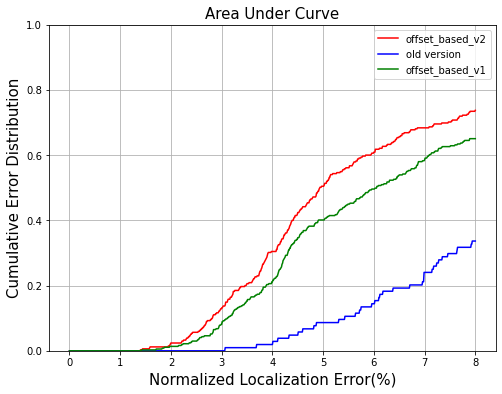

In [4]:
colors = ['red', 'blue', 'green']
fig, ax = plt.subplots(figsize=(8,6))
failureThreshold=0.08
step=0.0001
lb_names = ['offset_based_v2', 'old version', "offset_based_v1"]
anno_root = '/aidata/anders/objects/landmarks/metrics/TEST'
anno_paths = glob((os.path.join(anno_root, '*.json')))

for i, path in enumerate(anno_paths):              
    annos = load_json(path)
    errors = np.asarray(annos['nle'])
    num_samples = annos['num_samples']
    interocular = annos['interocular']
    nErrors = len(errors)
    xAxis = list(np.arange(0., failureThreshold + step, step))
    ced = [float(np.count_nonzero([errors <= x])) / nErrors for x in xAxis]
    AUC = simps(ced, x=xAxis) / failureThreshold
    failureRate = 1. - ced[-1]
    print('-' * 70)
    print(path.split('/')[-1])
    print("AUC @ {0}: {1}".format(failureThreshold, np.round(AUC, 3)))
    print("Failure rate: {0}".format(np.round(failureRate, 3)))
    plt.plot(np.asarray(xAxis) * 100, ced, color=colors[i], label=lb_names[i])
plt.ylim([0, 1])
plt.title('Area Under Curve', fontsize=15)
plt.xlabel('Normalized Localization Error(%)',  fontsize=15)
plt.ylabel('Cumulative Error Distribution',  fontsize=15)
plt.grid()
plt.legend()
plt.show()
    


['/aidata/anders/objects/landmarks/metrics/NLE/optimize.json', '/aidata/anders/objects/landmarks/metrics/NLE/q_range_bn.json', '/aidata/anders/objects/landmarks/metrics/NLE/q_sep.json', '/aidata/anders/objects/landmarks/metrics/NLE/range_bn.json', '/aidata/anders/objects/landmarks/metrics/NLE/sep.json']
AUC @ 0.08: 0.348
Failure rate: 0.258
optimize
AUC @ 0.08: 0.322
Failure rate: 0.245
Vanilla-bn_INT8
AUC @ 0.08: 0.371
Failure rate: 0.209
Range-bn & sep. offset INT8
AUC @ 0.08: 0.369
Failure rate: 0.191
Vanilla-bn_FP32
AUC @ 0.08: 0.378
Failure rate: 0.206
Range-bn & sep. offset FP32


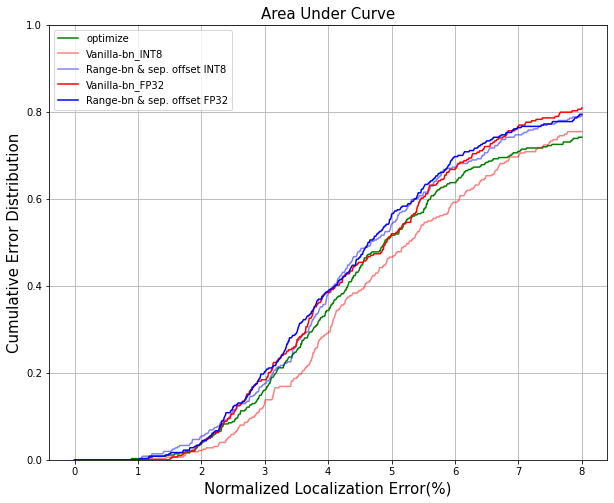

In [7]:
# setting 
import matplotlib.colors as mcolors
clc_names = ['green', 'red','blue', 'red', 'blue','brown',  'gray']
NLE_names = ["optimize", "Vanilla-bn_INT8", 
             "Range-bn & sep. offset INT8", 
             "Vanilla-bn_FP32",
             "Range-bn & sep. offset FP32"
             ]
failureThreshold=0.08
step=0.0001
anno_root = '/aidata/anders/objects/landmarks/metrics/NLE'
anno_paths = sorted(glob((os.path.join(anno_root, '*.json'))))
print(anno_paths)
fig, ax = plt.subplots(figsize=(10,8))

for i, path in enumerate(anno_paths):              
    annos = load_json(path)
    errors = np.asarray(annos['nle'])
    num_samples = annos['num_samples']
    interocular = annos['interocular']
    if interocular ==0:
        continue
    nErrors = len(errors)
    xAxis = list(np.arange(0., failureThreshold + step, step))
    ced = [float(np.count_nonzero([errors <= x])) / nErrors for x in xAxis]
    AUC = simps(ced, x=xAxis) / failureThreshold
    failureRate = 1. - ced[-1]
    print("AUC @ {0}: {1}".format(failureThreshold, np.round(AUC, 3)))
    print("Failure rate: {0}".format(np.round(failureRate, 3)))
    print(NLE_names[i])
    alpha = 1.
    if NLE_names[i] in ['Vanilla-bn_INT8', 'Range-bn & sep. offset INT8']:
        alpha = 0.5
    
    plt.plot(np.asarray(xAxis) * 100, ced, color=clc_names[i], label=NLE_names[i], alpha=alpha)
plt.ylim([0, 1])
plt.title('Area Under Curve', fontsize=15)
plt.xlabel('Normalized Localization Error(%)',  fontsize=15)
plt.ylabel('Cumulative Error Distribution',  fontsize=15)
plt.grid()
plt.legend()
plt.show()
    

['/aidata/anders/objects/landmarks/metrics/noDIV/eval.json', '/aidata/anders/objects/landmarks/metrics/noDIV/qeval.json']
AUC @ 0.08: 0.381
Failure rate: 0.182
eval
AUC @ 0.08: 0.35
Failure rate: 0.176
qeval


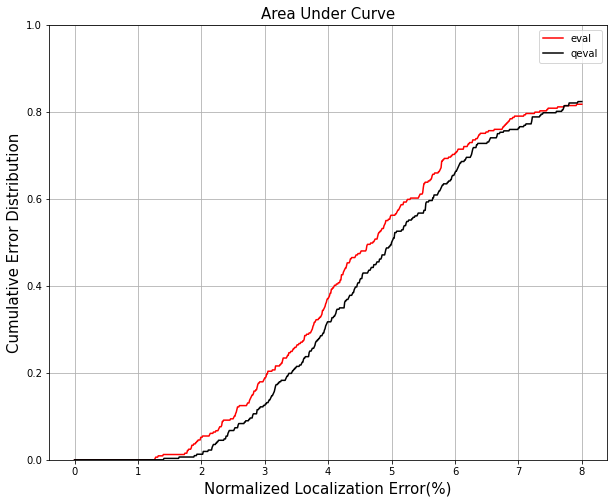

In [50]:
# setting 
import matplotlib.colors as mcolors
clc_names = ['red', 'black', 'blue', 'brown', 'green', 'gray']
NLE_names = ["eval", "qeval"]
failureThreshold=0.08
step=0.0001
anno_root = '/aidata/anders/objects/landmarks/metrics/noDIV'
anno_paths = glob((os.path.join(anno_root, '*.json')))
print(anno_paths)
fig, ax = plt.subplots(figsize=(10,8))
for i, path in enumerate(anno_paths):              
    annos = load_json(path)
    errors = np.asarray(annos['nle'])
    num_samples = annos['num_samples']
    interocular = annos['interocular']
    if interocular ==0:
        continue
    nErrors = len(errors)
    xAxis = list(np.arange(0., failureThreshold + step, step))
    ced = [float(np.count_nonzero([errors <= x])) / nErrors for x in xAxis]
    AUC = simps(ced, x=xAxis) / failureThreshold
    failureRate = 1. - ced[-1]
    print("AUC @ {0}: {1}".format(failureThreshold, np.round(AUC, 3)))
    print("Failure rate: {0}".format(np.round(failureRate, 3)))
    print(NLE_names[i])
    plt.plot(np.asarray(xAxis) * 100, ced, color=clc_names[i], label=NLE_names[i])
plt.ylim([0, 1])
plt.title('Area Under Curve', fontsize=15)
plt.xlabel('Normalized Localization Error(%)',  fontsize=15)
plt.ylabel('Cumulative Error Distribution',  fontsize=15)
plt.grid()
plt.legend()
plt.show()

['/aidata/anders/objects/landmarks/metrics/L1_loss/L1_eval.json', '/aidata/anders/objects/landmarks/metrics/L1_loss/eval.json']
AUC @ 0.08: 0.374
Failure rate: 0.135
eval
AUC @ 0.08: 0.339
Failure rate: 0.171
qeval


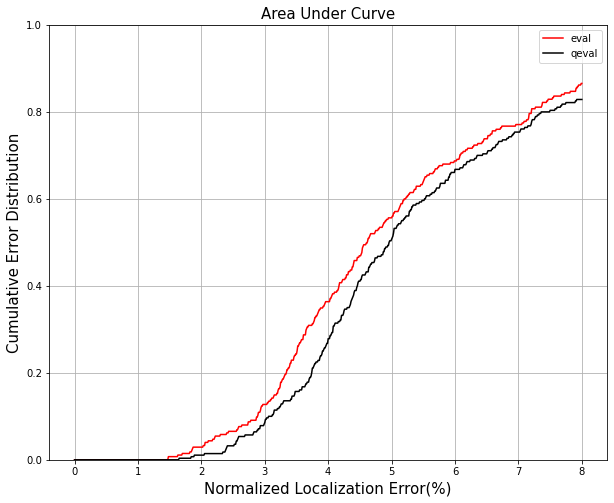

In [46]:
# setting 
import matplotlib.colors as mcolors
clc_names = ['red', 'black', 'blue', 'brown', 'green', 'gray']
NLE_names = ["eval", "qeval"]
failureThreshold=0.08
step=0.0001
anno_root = '/aidata/anders/objects/landmarks/metrics/L1_loss'
anno_paths = glob((os.path.join(anno_root, '*.json')))
print(anno_paths)
fig, ax = plt.subplots(figsize=(10,8))
for i, path in enumerate(anno_paths):              
    annos = load_json(path)

    errors = np.asarray(annos['nle'])
    num_samples = annos['num_samples']
    interocular = annos['interocular']
    if interocular ==0:
        continue
    nErrors = len(errors)
    xAxis = list(np.arange(0., failureThreshold + step, step))
    ced = [float(np.count_nonzero([errors <= x])) / nErrors for x in xAxis]
    AUC = simps(ced, x=xAxis) / failureThreshold
    failureRate = 1. - ced[-1]
    print("AUC @ {0}: {1}".format(failureThreshold, np.round(AUC, 3)))
    print("Failure rate: {0}".format(np.round(failureRate, 3)))
    print(NLE_names[i])
    plt.plot(np.asarray(xAxis) * 100, ced, color=clc_names[i], label=NLE_names[i])
plt.ylim([0, 1])
plt.title('Area Under Curve', fontsize=15)
plt.xlabel('Normalized Localization Error(%)',  fontsize=15)
plt.ylabel('Cumulative Error Distribution',  fontsize=15)
plt.grid()
plt.legend()
plt.show()